There are many notebooks developed to classify the images over two class. In many of them, image classification(deep learning) is used.

In my opinion, deep learning as a solution for this problem statement is a classic example of over-engineering.
So, I have used opencv for classifying the images.
With few lines of code, I have achieved an accuracy of 96%.

# Import Libraries

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
positive_srcdir = '../input/surface-crack-detection/Positive'
negative_srcdir = '../input/surface-crack-detection/Negative'
all_images = [positive_srcdir, negative_srcdir]

In [3]:
positive_images = len(os.listdir(positive_srcdir))
negative_images = len(os.listdir(negative_srcdir))
total_images = negative_images + positive_images

print(f'Total number of positive images are {positive_images}')
print(f'Total number of negative images are {negative_images}')

Total number of positive images are 20000
Total number of negative images are 20000


From the data description provided, it is clear that data is perfectly balanced over two class where each class have 20000 images

# Plot Positive Samples

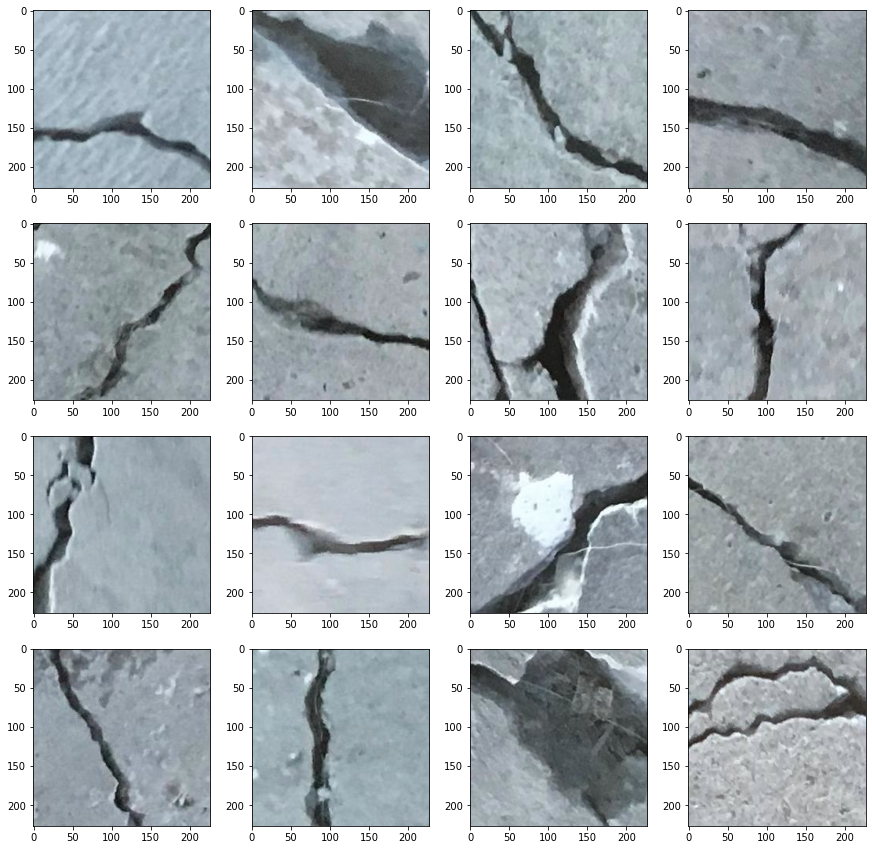

In [4]:
rows=4
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):        
        if img_count < positive_images:
            axes[i, j].imshow(cv2.imread(os.path.join(positive_srcdir, os.listdir(positive_srcdir)[img_count])))
            img_count+=1

# Plot Negative Samples

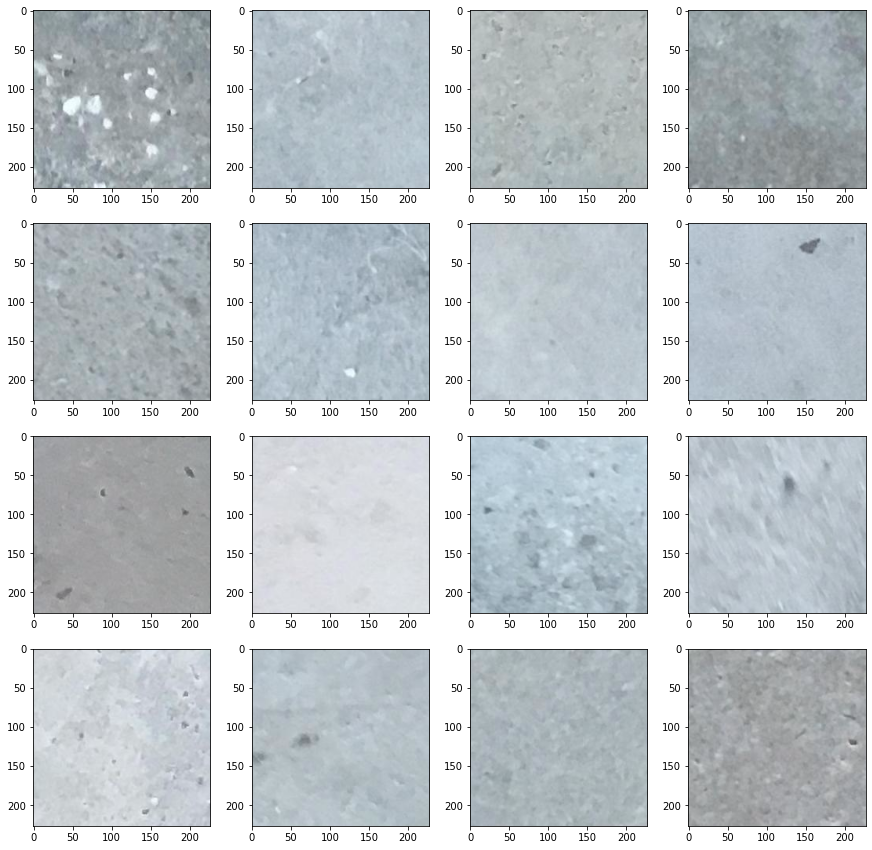

In [ ]:
rows=4
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):        
        if img_count < negative_images:
            axes[i, j].imshow(cv2.imread(os.path.join(negative_srcdir, os.listdir(negative_srcdir)[img_count])))
            img_count+=1

# Method to Classify Images

In [6]:
def detect_crack(image_name, contour_threshold):
    #read image
    image = cv2.imread(image_name)
    #sharpen the image to fine-tune the edges using the kernel
    kernel = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
    sharpen_image = cv2.filter2D(image, -1, kernel)
    #filter out small edges by using blur method
    blurred = cv2.GaussianBlur(sharpen_image, (3, 3), 0)
    #convert image to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    #convert grayscale image to binary image
    (T, threshInv) = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
    #detect contours in binary image
    contours, h = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    if contours:
        #finding the contour with maximum pixel points
        max_len_cnt = max([len(x) for x in contours])
        if max_len_cnt < 100:
            return True
        else:
            return False

    else:
        return True
    
    

# Classifying Images

In [7]:
#define dictionary to store class result
class_result = dict()
#contour_threshold is set to 100
contour_threshold = 100

#looping over both class
for classes in all_images:
    class_count = 0
    for files in os.listdir(classes):
        image_name = os.path.join(classes, files)
        crack_status = detect_crack(image_name, contour_threshold)
        if crack_status:
            class_count+=1
            
    class_result[os.path.basename(classes)] = class_count 

Initially, I have kept contour_threshold as 100.

Basically,

* Positive images's largest contour is expected to have more than 100 pixels.

* Negative image's largest contour is expected to have less than 100 pixels.

For future work, contour_threshold can be tuned to achieve better results.


In [8]:
class_result

{'Positive': 1582, 'Negative': 19962}

From above result, it is clear that:
* 1582 positive images are misclassified
* 19962 negative images are correcly classified

In [9]:
#accuracy
true_positive = positive_images - class_result['Positive']
true_negative = class_result['Negative']

accuracy = (true_positive + true_negative) / total_images
print(f'Accuracy is {round(accuracy*100, 2)}%')


Accuracy is 95.95%


Around 96% accuracy is achieved using basic methods of opencv.